# Importing required modules

In [6]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 1.4 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.8 MB 1.5 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 2.9 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.8 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\python312\\lib\\site-packages\\pip-24.0.dist-info\\AUTHORS.txt'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install bctpy
!pip install numpy
!pip install networkx
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import networkx as nx
import bct
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [9]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

You can see what's in a module using `dir` (I will not actually run it because it prints out a lot)

In [5]:
# dir(nx)

NetworkX has a lot of stuff in it. As such, the following is a #badidea, for any module.

In [6]:
# from networkx import *

# Basic data types in NetworkX

NetworkX provides the following classes that represent network-related data,
as well as network analysis algorithms that operate on these objects:

**Graph**       - Undirected graph with self loops

**DiGraph**      - Directed graph with self loops

**MultiGraph**   - Undirected Graph with self loops and multiple edges

**MultiDiGraph** - Directed Graph with self loops and multiple edges

# Getting started
Create an empty, undirected network

In [10]:
G = nx.Graph()

In [11]:
nx.__version__

'3.3'

# Nodes
Nodes can be almost anything, including numbers, strings, GPS coordinates, you name it.

Nodes can be added one at a time:

In [12]:
G.add_node(0)
G.add_node("Walter")

# tuple object representing, say, longitude and latitude
pos = (51.0447, 114.0719) 
G.add_node(pos)

...or many at once from a python container

In [14]:
# [1,2,3] is a list containing 1, 2, and 3
G.add_nodes_from([1, 2, 3])

print(G.nodes)

[0, 'Walter', (51.0447, 114.0719), 1, 2, 3]


# Node attributes
Nodes can have arbitrary attributes associated with them, contained in a string-index dictionary

Adding attributes at the time of node creation using keyword arguments:

In [15]:
G.add_node("Firefly", eye_color='amber', weight=12)

You can also add attributes to an already existing node

In [20]:
G.add_node("Walter")

# add an attribute "fur colour" with value brown/white tabby to Walter
G.nodes["Walter"]["fur colour"] = 'brown/white tabby'

print(G.nodes)
print(G.nodes["Walter"]) # how to get attrs printed

[0, 'Walter', (51.0447, 114.0719), 1, 2, 3, 'Firefly']
{'fur colour': 'brown/white tabby'}


G.nodes[n] gives a dictionary containing all the attribute:value pairs associated with node n

In [21]:
print("Firefly's eyes are ", G.nodes["Firefly"]["eye_color"], " and she weighs ", G.nodes['Firefly']['weight'], " pounds")
print("Walter has ", G.nodes["Walter"]["fur colour"], " coloured fur.")

Firefly's eyes are  amber  and she weighs  12  pounds
Walter has  brown/white tabby  coloured fur.


# Edges

An edge between node1 and node2 is represented by a tuple (node1, node2)  
They can be added one at a time:

In [22]:
# add edge between node 0 and node 1
G.add_edge(0, 1)

Or many at once from a container

In [23]:
edge_list = [ (2, 1), ("Firefly", "Walter"), (3, 4) ]
G.add_edges_from(edge_list)

# Nodes will be automatically created if they don't exist!

**Note:** Nodes will be automatically created if they don't already exist.

# Edge attributes
Like nodes, edges can also have arbitrary attributes. An important and special one (for many algorithms) is "weight"  

The syntax for adding/accessing edge attributes is the similar to that for nodes:

In [24]:
G.add_edge("Walter", "Harvey", weight=10)

G.add_edge("Calgary", "Edmonton")
G.edges["Calgary", "Edmonton"]['distance'] = 300

`G.edges[node1, node2]` is a dictionary containing all attribute:value pairs associated with the edge from node1 to node2

# Basic operations

### Size of the network

In [25]:
# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

11
11
6
6
G has 11 nodes and 6 edges.


###Testing to see whether nodes or edges exist

In [26]:
G.has_node("Harvey")

True

More pythonic way

In [27]:
"Walter" in G

True

For edges, you must use has_edge (no syntax like `edge in G`)

In [28]:
print(G.has_edge(3, 4))
print(G.has_edge("Firefly", 0))

True
False


### Finding neighbors of a node

In [30]:
list(G.neighbors(1))
list(G.neighbors("Firefly"))

['Walter']

* In `DiGraph` objects, `G.neighbors(node)` gives the successors of `node`, as does `G.successors(node)`  
* Predecessors of `node` can be obtained with `G.predecessors(node)`

### Iterating over nodes and edges
Nodes and edges can be iterated over with `G.nodes()` and `G.edges()` respectively  

In [37]:
for node, data in G.nodes(data=True): # data=True includes node attributes as dictionaries
    print("Node {0}\t\t\t: {1}".format(node, data))
print("---------------------------------------------------------")
for node in G.nodes(): 
    print(node)

Node 0			: {}
Node Walter			: {'fur colour': 'brown/white tabby'}
Node (51.0447, 114.0719)			: {}
Node 1			: {}
Node 2			: {}
Node 3			: {}
Node Firefly			: {'eye_color': 'amber', 'weight': 12}
Node 4			: {}
Node Harvey			: {}
Node Calgary			: {}
Node Edmonton			: {}
---------------------------------------------------------
0
Walter
(51.0447, 114.0719)
1
2
3
Firefly
4
Harvey
Calgary
Edmonton


In [41]:
for n1, n2, data in G.edges(data=True):
    print("{0} <----> {1}: {2}".format(n1, n2, data))

print("-"*50)

for source, target in G.edges():
    print("{0} <----> {1}".format(source, target))

0 <----> 1: {}
Walter <----> Firefly: {}
Walter <----> Harvey: {'weight': 10}
1 <----> 2: {}
3 <----> 4: {}
Calgary <----> Edmonton: {'distance': 300}
--------------------------------------------------
0 <----> 1
Walter <----> Firefly
Walter <----> Harvey
1 <----> 2
3 <----> 4
Calgary <----> Edmonton


### Calculating degrees

In [42]:
# one node
print(G.degree("Walter")) # returns an integer

# all nodes (returns a dictionary (not really a dictionary, but now a degreeview object) with node : degree pairs for all nodes)
print(G.degree())

# just the degree sequence
print([G.degree(node) for node in G])

# degrees --> number of connections!

2
[(0, 1), ('Walter', 2), ((51.0447, 114.0719), 0), (1, 2), (2, 1), (3, 1), ('Firefly', 1), (4, 1), ('Harvey', 1), ('Calgary', 1), ('Edmonton', 1)]
[1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1]


As you know, in directed graphs (of class `DiGraph`) there are two types of degree. Things work just as you expect
* `G.in_degree(node) `
* `G.out_degree(node) # same as G.degree()`


# Other operations

* ***`subgraph(G, nbunch)` or `G.subgraph(nbunch)`***       
subgraph of G induced by nodes in nbunch    

* ***`reverse(G)`***       
DiGraph with edges reversed 

* ***`union(G1, G2)`***      
graph union    

* ***`disjoint_union(G1, G2)`***     
same, but treats nodes of G1, G2 as different 

* ***`intersection(G1, G2)`***      
graph with only the edges in common between G1, G2

* ***`difference(G1, G2)`***      
graph with only the edges G1 that aren't in G2

* ***`copy(G)` or `G.copy()`***     
copy of G

* ***`complement(G)` or `G.complement()`***     
the complement graph of G 

* ***`convert_to_undirected(G)` or `G.to_undirected()`***     
undirected version of G (a Graph or MultiGraph)  

* ***`convert_to_directed(G)` or `G.to_directed()`***      
directed version of G (a DiGraph of MultiDiGraph)

* ***`adjacency_matrix(G)`***      
adjacency matrix A of G (in sparse matrix format; to get full matrix, use A.toarray() )

# Graph I/O

Usually you will not be building a network from scratch one node/link at a time. Instead, you will
want to read it in from an appropriate data file. NetworkX can understand the following common graph
formats:

* edge lists
* adjacency lists
* GML
* GEXF
* Python 'pickle'
* GraphML
* Pajek
* LEDA
* YAML

# Getting started: reading in an edge list
Put the file `test.txt` from .zip data file into your working directory for IPython  
If you don't know the present working directory, you can get it by typing  

`%pwd`

in any cell

Read in the file with the following options
* lines starting with `#` are treated as comments and ignored  
* use a `Graph` object to hold the data (i.e., network is undirected)  
* data are separated by whitespace (' ')
* nodes should be treated as integers (`int`)
* encoding of the text file containing the edge list is utf-8

In [43]:
# read in an edge list from the file 'test.txt'
G = nx.read_edgelist('./test.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

### Allowed formats
* Node pairs with no data  
`1 2`
* Node pairs with python dictionary  
`1 2 {weight:7, color:"green"}`

# Basic analysis
A large number of basic analyses can be done in one line using NetworkX + numpy or builtin python functions like `min`, `max`, etc.

In [44]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [45]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  443
Number of edges:  540

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1
Maximum degree:  8


# Brain Connectivity Toolbox 
The Brain Connectivity Toolbox can also be used for basic analyses. The major difference is that it works with numpy arrays - not the graph objects of Networkx. You should also be very careful to read the headers of each function, and follow up with referenced papers as necessary. The functions often assume prior knowledge!

In [46]:
G_array = nx.to_numpy_array(G)
bct_degrees = bct.degrees_und(G_array)

# for a directed graph, the syntax is:
# in_deg, out_deg, tot_deg = bct.degrees_dir(G_array)

bct_kmin = min(bct_degrees)
bct_kmax = max(bct_degrees)

bct_N = len(G_array)
bct_L = np.sum(G_array)/2 

print("Number of nodes: ", bct_N)
print("Number of edges: ", bct_L)
print()
print("Average degree: ", 2*bct_L/bct_N)
print("Average degree (alternate calculation)", np.mean(bct_degrees))
print()
print("Minimum degree: ", bct_kmin)
print("Maximum degree: ", bct_kmax)

Number of nodes:  443
Number of edges:  540.0

Average degree:  2.4379232505643342
Average degree (alternate calculation) 2.4379232505643342

Minimum degree:  1.0
Maximum degree:  8.0


## Documentation for BCT algorithms: https://github.com/aestrivex/bctpy/tree/master/bct/algorithms ##

# Drawing the network
* NetworkX can draw networks using a large number of layout algorithms  
* The results are not as pretty as Gephi, but NetworkX is better for a quick 'n dirty visualization and
gives you finer-grained control over the layout.

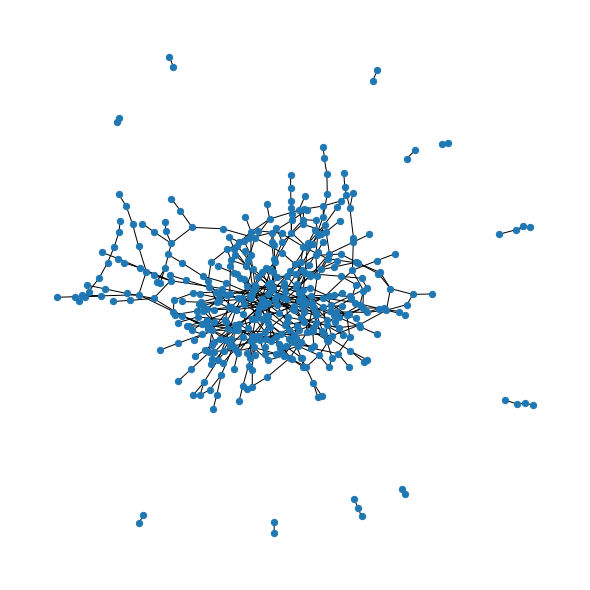

In [41]:
# using the force-based or "spring" layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=40)

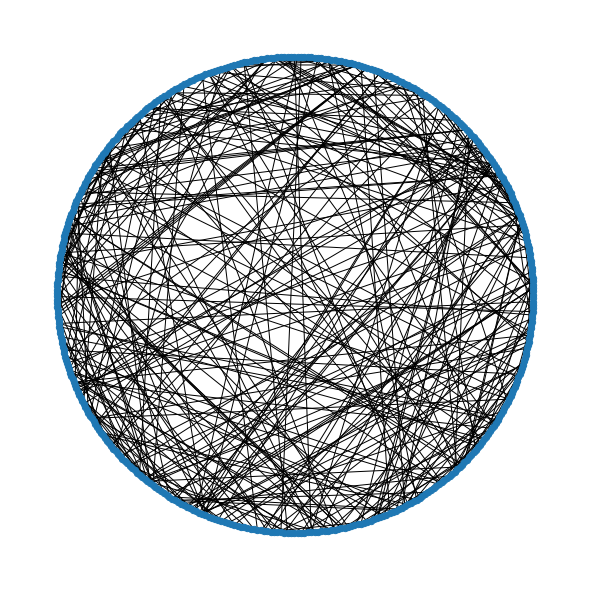

In [42]:
# using the fcircular layout algorithm
fig = plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=40)

# Plotting the degree distribution

Let's plot it in log scale first

`numpy` can be used to get logarithmically-spaced bins between the minimum and maximum degree

In [30]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

now plot it

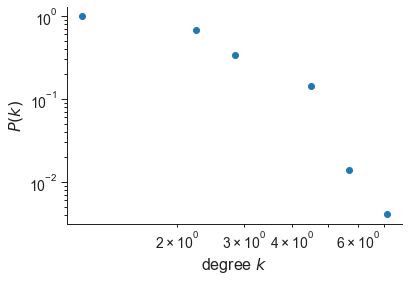

In [31]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

This is clearly not a network with anything like a heavy-tailed or power law degree distribution.
Let's also plot it in linear-linear scale.

The `linspace` command in `numpy` is used to get linearly-spaced numbers between two extremes

In [32]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

Now plot it

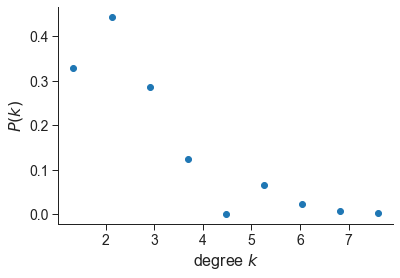

In [33]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

# Hands-on exercise
Now we will take a look at the networks in `example_1.txt` and `example_2.txt`. Read in the edge
list files and do the following:
* Do the basic measurements shown above. What can you suspect about the degree distribution of the network just based on the average and extremes in degree?
* Plot the degree distribution in log-log scale. Also plot it in linear scale. Comment on how this fits with the previous point.
* Draw the network using the two layout algorithms shown above. How does the the network's appearance echo your other findings?

# Generating an ER network
* This model ($G(n,p)$) is parameterized by number of nodes $n$ and connection probability $p$
* We will implement this as a function that takes $n$, $p$ as arguments

In [37]:
def erdos_renyi(n, p):
    # Create an empty graph
    G = nx.Graph()
    
    # add nodes (integers between zero and n-1)
    G.add_nodes_from(range(0, n))
    
    # for all possible pairs of nodes, add a link with probability p
    for node1 in range(0, n):
        for node2 in xrange(node1 + 1, n):
            if np.random.uniform() < p:
                G.add_edge(node1, node2)
    return G

In [38]:
# More pythonic way
import itertools as it

def erdos_renyi(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(edge for edge in it.combinations(nodes, 2) if np.random.uniform() < p)
    return G

### Let's test to see if it works

In [39]:
G = erdos_renyi(10**3, 1e-2)

print("G has {0} nodes.".format(len(G)))
print("G has {0} edges.".format(G.size()))
degrees = [G.degree(node) for node in G]
print("Avg. degree of G is {0}.".format(np.mean(degrees)))

G has 1000 nodes.
G has 5114 edges.
Avg. degree of G is 10.228.


Do these statistics make sense for the $n$ and $p$ we provided?

## Graph generation

* ***`erdos_renyi_graph(n, p)`***   
Generate a random graph. More or less the same as we implemented above.
* ***`fast_gnp_random_graph(n, p)`***   
Much faster for sparse graphs

## Paths and path length
All of the below work on both `Graph` and `DiGraph` objects

* ***`has_path(G, source, dest)`***   
test to see if there is a path (of any length) in G from `source` to `dest`   
* ***`shortest_path(G, source, dest)`*** and ***`shortest_path_length(G, source, dest)`***   
former returns path as a sequence of nodes, latter only returns the length   
* ***`all_shortest_paths(G, source, dest)`***   
same as above, but gives ALL shortest paths   
* ***`single_source_shortest_path(G, source)`*** and ***`single_source_shortest_path_length(G, source)`***   
return dictionary `d` where `d[node]` is respectively, the shortest path/path length from `source` to `node`   
* ***`all_pairs_shortest_path(G)`*** and ***`all_pairs_shortest_path_length(G)`***   
return dictionary `d` where `d[node1][node2]` is as above   
* ***`dijkstra_path(G, source, dest)`*** and ***`dijkstra_path_length(G, source, dest)`***   
As above, but for weighted `Graph`/`DiGraph` objects   
* ***`single_source_dijkstra_path(G, source)`*** and ***`single_source_dijkstra_path_length(G, source)`***   
As above, but for weighted `Graph`/`DiGraph` objects  

## Searching
All of the below work on both `Graph` and `DiGraph` objects

* ***`bfs_tree(G, source)`***   
Return a Di/Graph representing the tree spanned by a breadth-first search starting at `source`   
* ***`dfs_tree(G, source)`***  
Same using depth-first search (gives same result)   
* ***`all_shortest_paths(G, source, dest)`***   
same as above, but gives ALL shortest paths   

## Connectedness (Undirected)
The below work only on `Graph` objects

* ***`is_connected(G)`***   
`True` or `False` depending on whether `G` is connected or not      
* ***`connected_components(G)`***     
Return a list of lists, where each sub-list contains the nodes in one component   
* ***`number_connected_components(G)`***      
Returns only the length of the list above   
* ***`connected_component_sugraphs(G)`***      
Returns a list of new `Graph` objects each representing a component of `G`   
* ***`node_connected_component(G, node)`***      
Return a list of the nodes in the component of `G` containing `node`   

## Connectedness (Strong and weak)
The commands below work only on `DiGraph` objects

Note: the `is_weakly_` versions are equivalent to first converting the DiGraph to undirected using G.undirected(), and then running the undirected equivalents above.
    
* ***`is_strongly_connected(G)`***   
* ***`strongly_connected_components(G)`***     
* ***`number_strongly_connected_components(G)`***      
* ***`strongly_connected_component_sugraphs(G)`***     


* ***`is_weakly_connected(G)`***   
* ***`weakly_connected_components(G)`***     
* ***`number_weakly_connected_components(G)`***      
* ***`weakly_connected_component_sugraphs(G)`***  

All are analogous to the undirected case   
  